In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('ad_click_dataset.csv')
dataset.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [3]:
dataset.shape

(1000, 10)

In [4]:
dataset.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [5]:
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


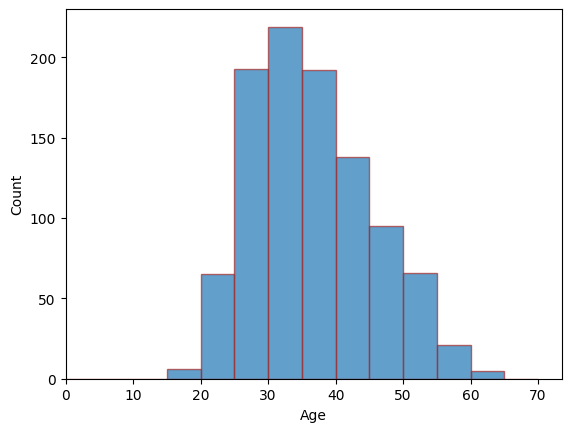

In [6]:
plt.hist(dataset["Age"],edgecolor='brown',alpha=0.7,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70])
plt.xlabel('Age')
plt.axis(xmin=0)
plt.ylabel('Count')
plt.show()

In [7]:
d=pd.DataFrame(dataset['Country'],dataset['Clicked on Ad'])
d.describe()

,Country
count,1000
unique,2
top,Tunisia
freq,500


In [8]:
all_countries=dataset['Age'].unique()
all_countries

array([35, 31, 26, 29, 23, 33, 48, 30, 20, 49, 37, 24, 41, 36, 40, 52, 28,
       34, 22, 57, 53, 39, 46, 32, 25, 43, 45, 50, 47, 27, 42, 38, 54, 21,
       60, 55, 44, 58, 56, 51, 19, 59, 61], dtype=int64)

In [9]:
dataset[dataset['Clicked on Ad']==1]['Country'].value_counts()

Australia            7
Ethiopia             7
Turkey               7
South Africa         6
Liechtenstein        6
                    ..
Isle of Man          1
Mauritania           1
Wallis and Futuna    1
Germany              1
Comoros              1
Name: Country, Length: 215, dtype: int64

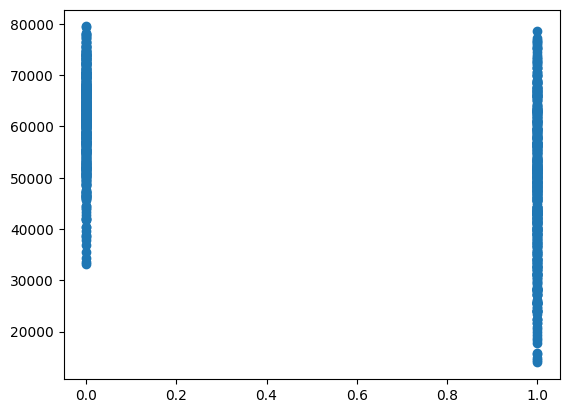

In [10]:
plt.scatter(dataset['Clicked on Ad'],dataset['Area Income'])
plt.show()

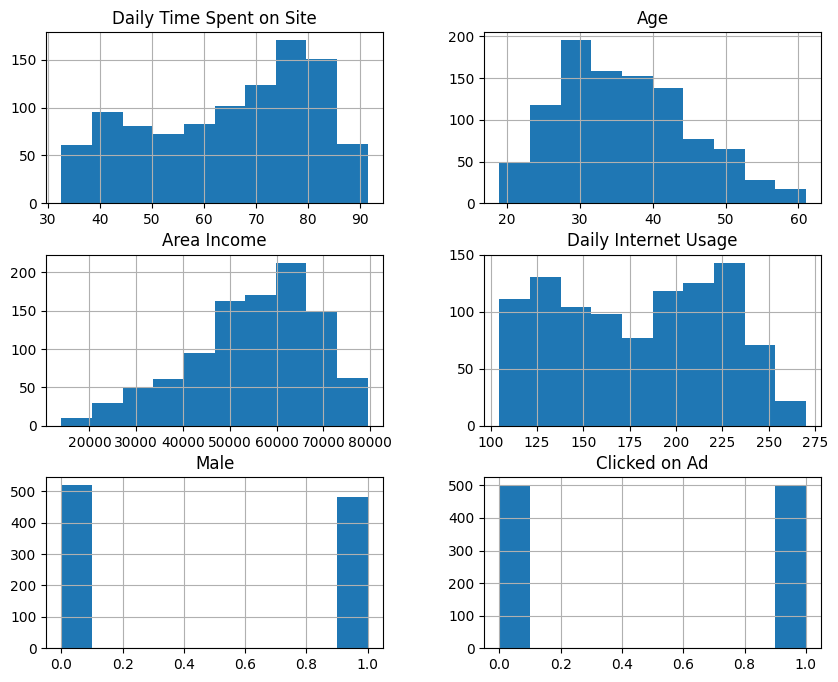

In [11]:
dataset.hist(figsize=(10,8))
plt.show()

<Figure size 1200x1000 with 0 Axes>

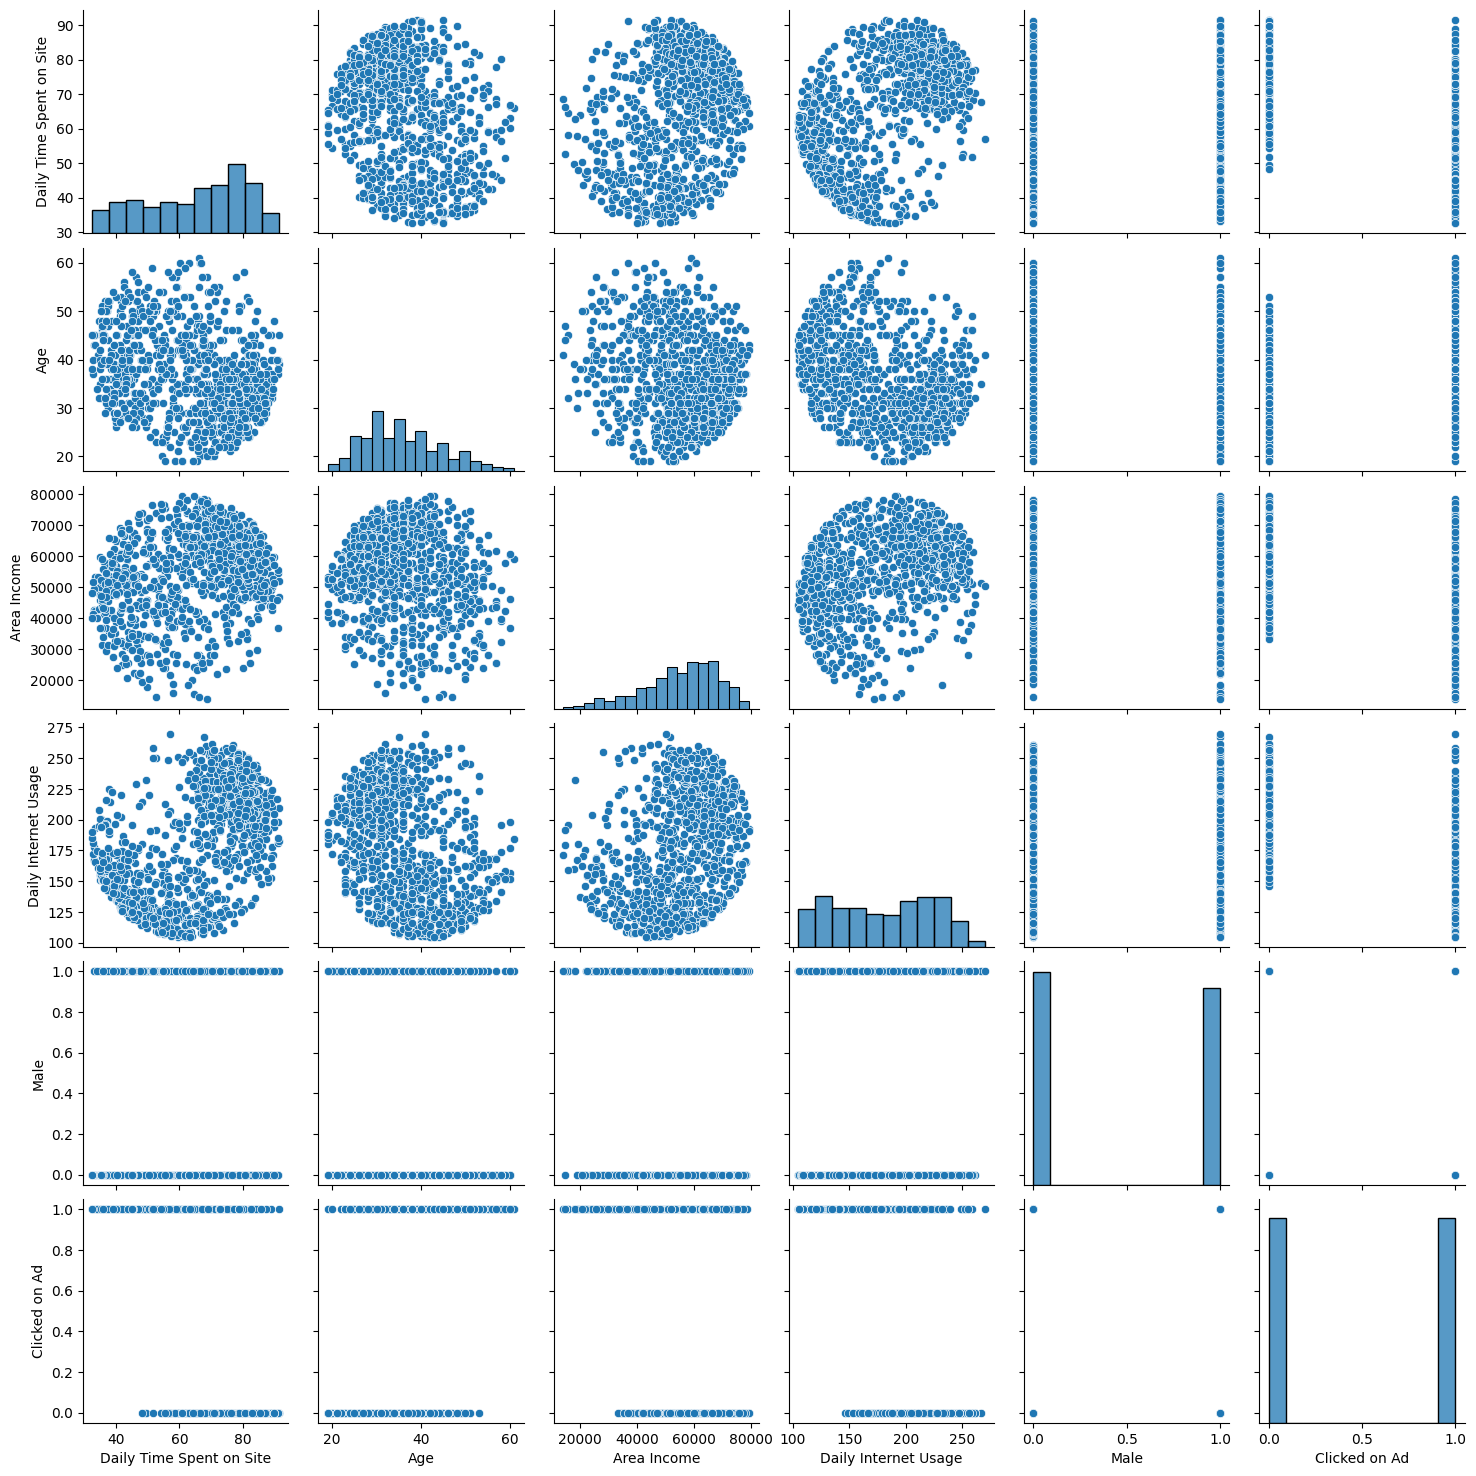

In [12]:
plt.figure(figsize=(12,10))
sns.pairplot(dataset)
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_8336\3387572453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

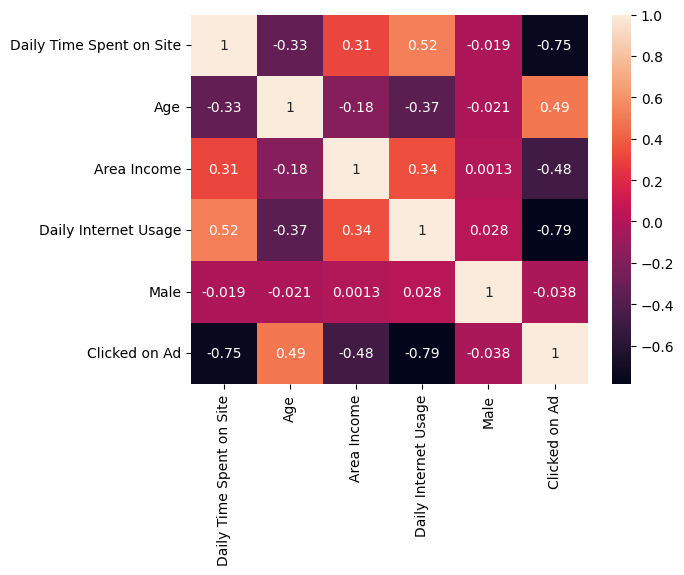

In [13]:
sns.heatmap(dataset.corr(),annot=True)

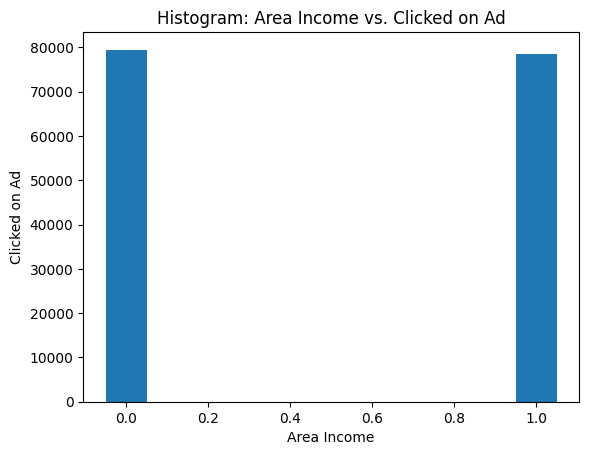

In [14]:
x = dataset['Area Income']
y = dataset['Clicked on Ad']
plt.bar(y,x,width=0.1)
plt.xlabel('Area Income')
plt.ylabel('Clicked on Ad')
plt.title('Histogram: Area Income vs. Clicked on Ad')
plt.show()

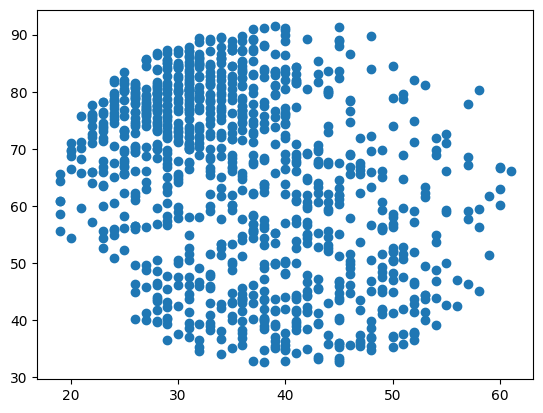

In [15]:
plt.scatter(dataset['Age'],dataset['Daily Time Spent on Site'])
plt.show()

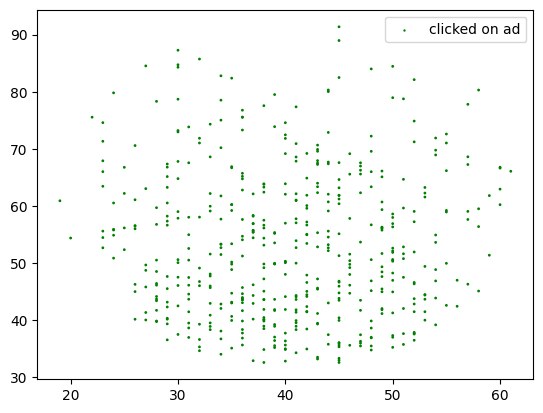

In [16]:
plt.scatter(dataset['Age'],dataset['Daily Time Spent on Site'],dataset['Clicked on Ad'],label='clicked on ad',color='g')
plt.legend()
plt.show()

In [17]:
dataset['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

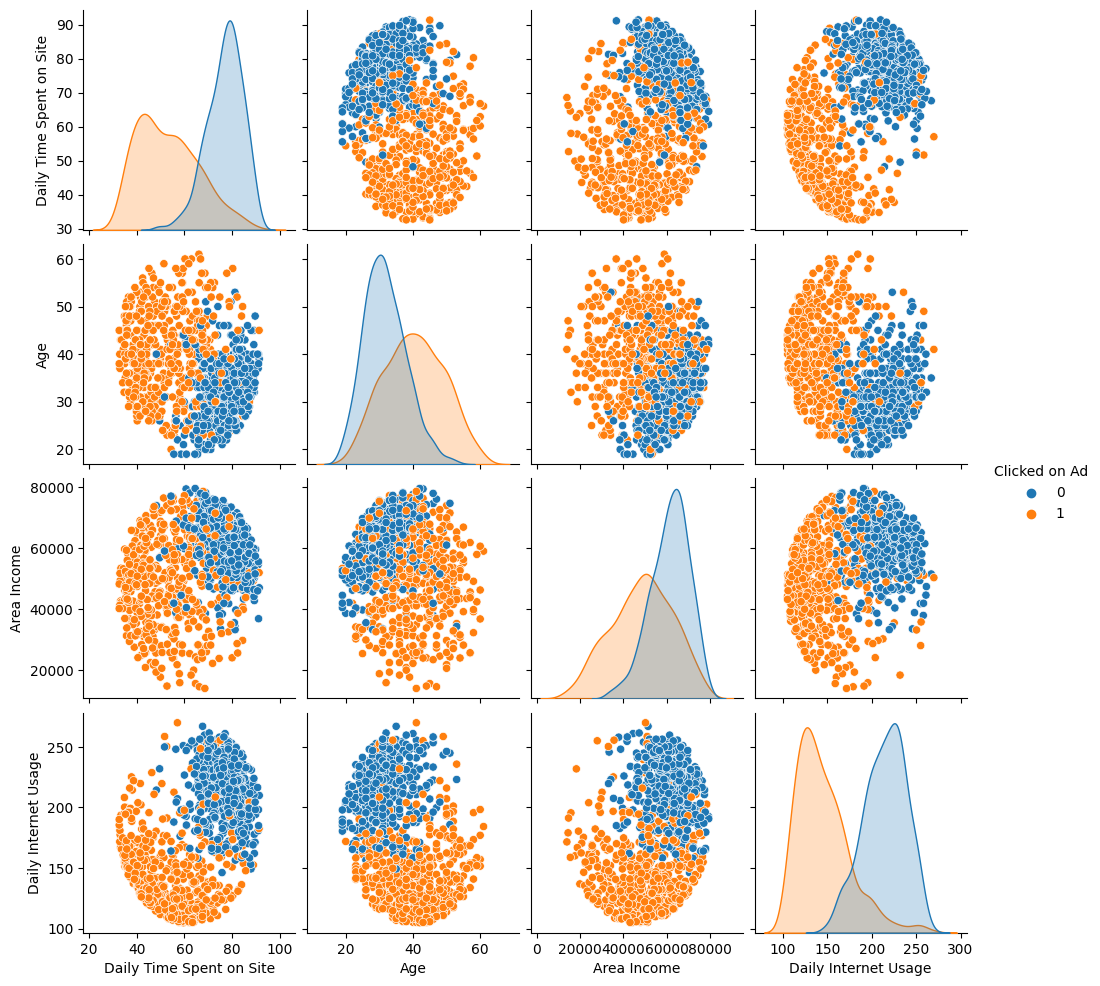

In [18]:
sns.pairplot(dataset,hue='Clicked on Ad',vars=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage'])
plt.show()

In [19]:
x=dataset[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
y=dataset['Clicked on Ad']

In [20]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(x,y,test_size=0.4,random_state=111)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)

In [23]:
from sklearn import metrics
print('Accuracy of the model is ',metrics.accuracy_score(y_test,predicted))

Accuracy of the model is  0.92


In [24]:
print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,predicted))

Confusion matrix is :
 [[183   9]
 [ 23 185]]


In [25]:
print("f1 score is :",metrics.f1_score(y_test,predicted))
print("precision_score is :",metrics.precision_score(y_test,predicted))
print("recall_score is :",metrics.recall_score(y_test,predicted))

f1 score is : 0.9203980099502488
precision_score is : 0.9536082474226805
recall_score is : 0.8894230769230769


## THIS ML MODEL HAS AN ACCURACY OF 92%